<a href="https://colab.research.google.com/github/arilvers/IntegrateCA/blob/main/ArianeGregorio_AI_DV_DP_ICA_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts


In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/arilvers/IntegrateCA/main/forestfires.csv")

In [16]:
df.dtypes #First, I want to identify the columns if they are categorical or numerical before start cleaning the dataset.

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [17]:
df.shape #The dataset has 517 rows and 13 columns.

(517, 13)

In [18]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [19]:
df.isnull().sum() #Identifying if the data is missing data and methods.

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [26]:
df.isnull().sum().sort_values(ascending=False) #With this command you place the columns with the highest number of missing values on the top.

area     0
rain     0
wind     0
RH       0
temp     0
ISI      0
DC       0
DMC      0
FFMC     0
day      0
month    0
Y        0
X        0
dtype: int64

In [30]:
for column in df.columns:
  percentage = df[column].isnull().mean()
  print(f'{column}: {round(percentage*100, 2)}%')  #The code was made to show the missing values in percentages

X: 0.0%
Y: 0.0%
month: 0.0%
day: 0.0%
FFMC: 0.0%
DMC: 0.0%
DC: 0.0%
ISI: 0.0%
temp: 0.0%
RH: 0.0%
wind: 0.0%
rain: 0.0%
area: 0.0%


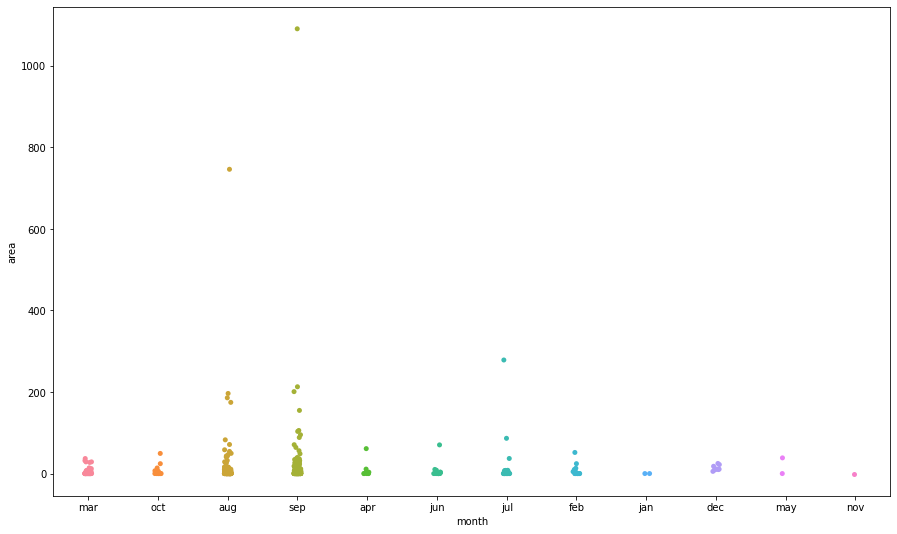

In [21]:
plt.figure(figsize =(15, 9))
sns.stripplot(x="month", y="area", data=df, jitter=0.05) #This figure is to illustrate where and when had more fires.




In [24]:
df.describe()



,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [35]:
mode = ''.join(df['day'].mode()) 
df['day'].fillna(mode, inplace=True) #Even the "day" columns there is no empty data, I wanted to show how to complete a portion of data using the mode.


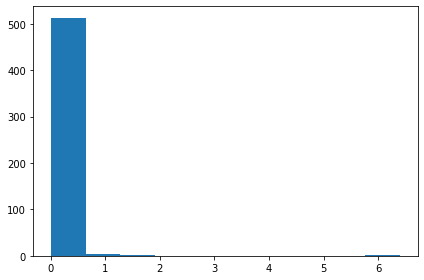

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1) 
plt.hist(df['rain'])
fig.tight_layout() 

The graph above represent how the rain was distributed.  The first bar, we could say and the last visible bar are probably outliers. They might be long rains or short showers that don't fit well in our rain categoaory.

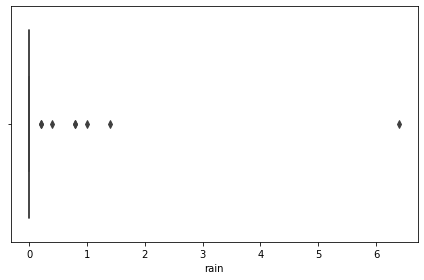

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=df['rain'])
fig.tight_layout()